<a href="https://colab.research.google.com/github/aayushkubb/Deep_Learning_Tutorial/blob/master/LSTM_Spam_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Context
The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam. 

# Problem Statement
Create a text classifier that can help us disambiguate Spam/Ham

# Evaluation Metrics

# Import

In [3]:
import pandas as pd
import numpy as np

#Visualization
from matplotlib import pyplot as plt


#Classification Metrics
from sklearn.metrics import classification_report

#Random Module
import random

#Wordcloud
from wordcloud import WordCloud, STOPWORDS


#NLTK Tokenize
from nltk.tokenize import word_tokenize 
import nltk
nltk.download('all')


#Counter
from collections import Counter

import re
from sklearn.model_selection import train_test_split


import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


#import library
from sklearn.preprocessing import LabelEncoder
import numpy as np


# Import Libraries
import sys, os, re, csv, codecs, numpy as np, pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D, Conv1D, SimpleRNN
from keras.layers import  Flatten, BatchNormalization
from keras.layers import MaxPooling1D
from keras.models import Model
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers


import sklearn
from keras.callbacks import ModelCheckpoint


from keras.layers.recurrent import SimpleRNN, LSTM, GRU

# Word2Vec
from gensim.models import Word2Vec

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

#Read the dataset

Download the dataset from here



https://drive.google.com/file/d/1qGMutJKOLc9qyMUa55yXnPvJUV9e3a-j/view?usp=sharing

In [4]:
sms_data = pd.read_csv("/content/spam.csv",encoding="ISO-8859-1")
sms_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
sms_data['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [6]:
sms_data['v1'].value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: v1, dtype: float64

In [7]:
sms_data = sms_data[['v1', 'v2']]
sms_data = sms_data.rename(columns={"v1":"Target","v2":"SMS"})
sms_data.head()

,Target,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Baseline Model

In [8]:
y=sms_data['Target'].apply(lambda x: 1 if x.lower()=='spam' else 0)

In [9]:
#Create a model where everything is a "ham"
y_pred=np.zeros(len(y))
print("Baseline Model -1")
print(classification_report(y,y_pred))



Baseline Model -1
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      4825
           1       0.00      0.00      0.00       747

    accuracy                           0.87      5572
   macro avg       0.43      0.50      0.46      5572
weighted avg       0.75      0.87      0.80      5572



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
#Create a model where you randomly assign "spam" or "ham"
options=[1,0]
y_pred=random.choices(options,k=len(y))

print("Baseline Model -2")
print(classification_report(y,y_pred))

Baseline Model -2
              precision    recall  f1-score   support

           0       0.86      0.50      0.63      4825
           1       0.12      0.46      0.20       747

    accuracy                           0.50      5572
   macro avg       0.49      0.48      0.41      5572
weighted avg       0.76      0.50      0.57      5572



In [11]:
#Create a model where you randomly assign "spam" or "ham"
options=[1,0,0,0,0]
y_pred=random.choices(options,k=len(y))

print("Baseline Model -3")
print(classification_report(y,y_pred))

Baseline Model -3
              precision    recall  f1-score   support

           0       0.86      0.79      0.83      4825
           1       0.12      0.18      0.14       747

    accuracy                           0.71      5572
   macro avg       0.49      0.48      0.48      5572
weighted avg       0.76      0.71      0.73      5572



In [12]:
#Create a model where you randomly assign "spam" or "ham"
options=[1,1,1,1,0]
y_pred=random.choices(options,k=len(y))

print("Baseline Model -4")
print(classification_report(y,y_pred))

Baseline Model -4
              precision    recall  f1-score   support

           0       0.86      0.19      0.32      4825
           1       0.13      0.80      0.23       747

    accuracy                           0.28      5572
   macro avg       0.50      0.50      0.27      5572
weighted avg       0.77      0.28      0.30      5572



# Plot the Wordcloud

In [13]:
text=" ".join(sms_data['SMS'].apply(lambda x: x.lower()).tolist())


In [14]:
#Create a Wordcloud
wordcloud=WordCloud(max_words=100,background_color='white',stopwords=STOPWORDS).generate(text)

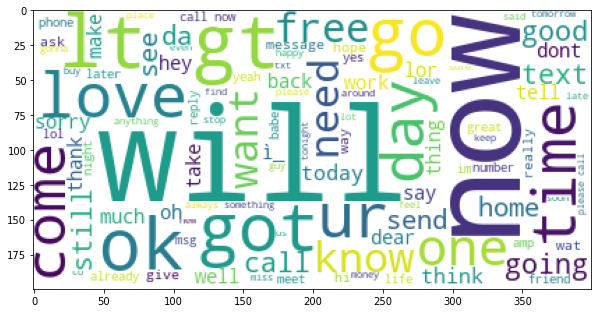

In [15]:
# Display the WC
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.show()

## Check WC for the SPAM/HAM dataset

In [16]:
ham_text=" ".join(sms_data[sms_data['Target']=='ham']['SMS'].apply(lambda x: x.lower()).tolist())
spam_text=" ".join(sms_data[sms_data['Target']!='ham']['SMS'].apply(lambda x: x.lower()).tolist())


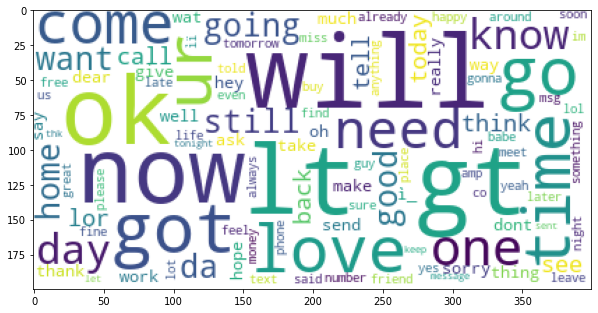

In [17]:
#Create a Wordcloud
wordcloud=WordCloud(max_words=100,background_color='white',stopwords=STOPWORDS).generate(ham_text)
# Display the WC
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.show()

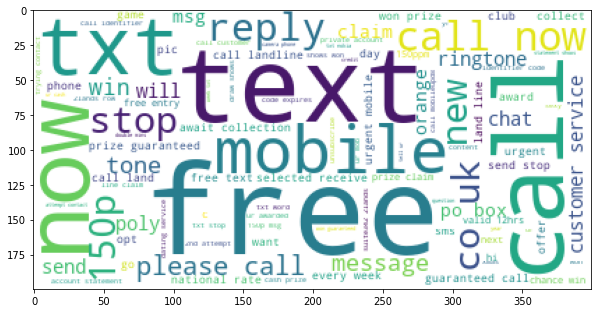

In [18]:
#Create a Wordcloud
wordcloud=WordCloud(max_words=100,background_color='white',stopwords=STOPWORDS,).generate(spam_text)
# Display the WC
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.show()

# Baseline Model using text

In [19]:
def text_classifier(sentence):
  if "free" in sentence or "call now" in sentence or "prize guaranteed" in sentence or \
  "please call" in sentence or "guaranteed call" in sentence or "customer service" in sentence:
    return 1
  else:
    return 0

In [20]:
y_pred=sms_data['SMS'].apply(lambda x : text_classifier(x))


In [21]:
print("Baseline Classifier using Text")
print(classification_report(y,y_pred))

Baseline Classifier using Text
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      4825
           1       0.61      0.13      0.22       747

    accuracy                           0.87      5572
   macro avg       0.74      0.56      0.57      5572
weighted avg       0.84      0.87      0.84      5572



In [ ]:
def collactions(sentences):
  bigrams = nltk.collocations.BigramAssocMeasures()
  bigramFinder = nltk.collocations.BigramCollocationFinder.from_documents(sentences)

  #bigrams
  bigram_freq = bigramFinder.ngram_fd.items()
  bigramFreqTable = pd.DataFrame(list(bigram_freq), columns=['bigram','freq']).sort_values(by='freq', ascending=False)

  return bigramFreqTable




In [ ]:
sentences=[word_tokenize(i) for i in sms_data['SMS'].tolist()]
collactions(sentences)

,bigram,freq
333,"(., I)",377
909,"(&, lt)",314
913,"(&, gt)",314
910,"(lt, ;)",314
914,"(gt, ;)",314
...,...,...
21893,"(call, like)",1
21894,"(times, oh)",1
21895,"(No, give)",1
21896,"(us, hypertension)",1


Data is not cleaned, lets first clean the dataset and then move forward

In [22]:
def character_counter(sentence_list):
  return Counter(" ".join(sentence_list))

def word_counter(sentence_list):
  word_count=[]
  for i in sentence_list:
    word_count.extend(i.split())
  return Counter(word_count)

In [23]:
Counter("My name is is ".split())

Counter({'My': 1, 'is': 2, 'name': 1})

In [24]:
character_counter(sms_data['SMS'])

Counter({'\r': 2,
         ' ': 86960,
         '!': 1381,
         '"': 265,
         '#': 287,
         '$': 23,
         '%': 10,
         '&': 916,
         "'": 1871,
         '(': 117,
         ')': 494,
         '*': 311,
         '+': 137,
         ',': 1913,
         '-': 574,
         '.': 11048,
         '/': 418,
         '0': 3186,
         '1': 1745,
         '2': 1699,
         '3': 851,
         '4': 1042,
         '5': 1067,
         '6': 801,
         '7': 856,
         '8': 1310,
         '9': 659,
         ':': 740,
         ';': 764,
         '<': 6,
         '=': 47,
         '>': 30,
         '?': 1541,
         '@': 35,
         'A': 1856,
         'B': 875,
         'C': 1389,
         'D': 1122,
         'E': 1892,
         'F': 643,
         'G': 844,
         'H': 1522,
         'I': 3462,
         'J': 299,
         'K': 388,
         'L': 1089,
         'M': 1206,
         'N': 1619,
         'O': 1811,
         'P': 960,
         'Q': 73,
         'R': 11

In [33]:
def data_preprocessing(x):
  return re.sub("[^a-zA-Z]"," ", x.lower())


In [34]:
sms_data['SMS']=sms_data['SMS'].apply(lambda x:data_preprocessing(x))

In [35]:
character_counter(sms_data['SMS'])

Counter({' ': 124623,
         'a': 25248,
         'b': 5310,
         'c': 8876,
         'd': 11275,
         'e': 34934,
         'f': 5745,
         'g': 8284,
         'h': 14204,
         'i': 22439,
         'j': 935,
         'k': 4533,
         'l': 15757,
         'm': 10573,
         'n': 21738,
         'o': 28962,
         'p': 6811,
         'q': 236,
         'r': 17738,
         's': 18898,
         't': 27921,
         'u': 12310,
         'v': 3504,
         'w': 8462,
         'x': 1586,
         'y': 10396,
         'z': 500})

In [36]:
len(word_counter(sms_data['SMS']))

7708

In [37]:
cc=word_counter(sms_data['SMS'])

In [38]:
# cc['com']

# Let's prep data for training

In [39]:
sms_data['SMS']=sms_data['SMS'].apply(lambda x: x.strip())

In [40]:
sms_data=sms_data[sms_data['SMS'].apply(lambda x: len(x)>=2)]

In [41]:
# Split data into training and test parts
train,test=train_test_split(sms_data,test_size=0.2,random_state=1)

# Tokenizer & Embeddings

In [42]:
train['SMS'].apply(lambda X: len(X)).describe()

count    4454.000000
mean       79.040413
std        59.868751
min         2.000000
25%        35.000000
50%        60.000000
75%       119.750000
max       908.000000
Name: SMS, dtype: float64

In [44]:
#Parameters

MAX_NB_WORDS=6000 #most frezent 6k words in the dataset
MAX_SEQUENCE_LENGTH=300



In [45]:
tokenizer = keras.preprocessing.text.Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(train.SMS)
train_sequences = tokenizer.texts_to_sequences(train.SMS)
test_sequences = tokenizer.texts_to_sequences(test.SMS)


In [47]:
# dictionary containing words and their index
word_index = tokenizer.word_index

print(word_index)
# total words in the corpus
print('Found %s unique tokens.' % len(word_index))

{'i': 1, 'to': 2, 'you': 3, 'a': 4, 'the': 5, 'u': 6, 'and': 7, 'is': 8, 'in': 9, 'me': 10, 'my': 11, 'it': 12, 'for': 13, 'your': 14, 'of': 15, 's': 16, 'that': 17, 'call': 18, 'have': 19, 'on': 20, 't': 21, 'now': 22, 'can': 23, 'm': 24, 'but': 25, 'so': 26, 'are': 27, 'not': 28, 'we': 29, 'or': 30, 'at': 31, 'do': 32, 'ur': 33, 'with': 34, 'be': 35, 'get': 36, 'if': 37, 'will': 38, 'just': 39, 'no': 40, 'this': 41, 'gt': 42, 'lt': 43, 'when': 44, 'up': 45, 'how': 46, 'ok': 47, 'go': 48, 'all': 49, 'from': 50, 'free': 51, 'll': 52, 'what': 53, 'out': 54, 'know': 55, 'he': 56, 'day': 57, 'like': 58, 'got': 59, 'then': 60, 'good': 61, 'am': 62, 'was': 63, 'there': 64, 'come': 65, 'its': 66, 'love': 67, 'time': 68, 'only': 69, 'send': 70, 'want': 71, 'as': 72, 'text': 73, 'n': 74, 'one': 75, 'r': 76, 'don': 77, 'by': 78, 'p': 79, 'she': 80, 'going': 81, 'today': 82, 'about': 83, 'need': 84, 'txt': 85, 'lor': 86, 'home': 87, 'see': 88, 'k': 89, 'back': 90, 'stop': 91, 'sorry': 92, 'd': 9

In [48]:
# make each sequence to 300
train_data = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
test_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

print(train_data.shape)
print(test_data.shape)


(4454, 300)
(1114, 300)


In [49]:
train_labels = train['Target']
test_labels = test['Target']

In [50]:
# converts the character array to numeric array. Assigns levels to unique labels.
le = LabelEncoder()
le.fit(train_labels)
train_labels = le.transform(train_labels)
test_labels = le.transform(test_labels)
print(le.classes_)
print(np.unique(train_labels, return_counts=True))
print(np.unique(test_labels, return_counts=True))

['ham' 'spam']
(array([0, 1]), array([3876,  578]))
(array([0, 1]), array([945, 169]))


In [ ]:
test_labels[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [52]:
from keras.utils.np_utils import to_categorical

labels_train = to_categorical(np.asarray(train_labels))
labels_test = to_categorical(np.asarray(test_labels))
print('Shape of data tensor:', train_data.shape)
print('Shape of label tensor:', labels_train.shape)
print('Shape of test-label tensor:', labels_test.shape)


Shape of data tensor: (4454, 300)
Shape of label tensor: (4454, 2)
Shape of test-label tensor: (1114, 2)


In [53]:
# sampling some o/p to see
print(train_labels[:5])   # here we see a single list of 1's and 0's. Where 1 means spam and 0 means ham 
print(labels_train[:5])   # here you would see One hot encoded o/p.  i.e 2 columns ham spam


[0 0 1 0 0]
[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


# Model using CNN



## Model using one-hot output label
Treating any problem as Multi-class problem


In [54]:


print('Training CNN 1D model.')
EMBEDDING_DIM=100
model = Sequential()
model.add(Embedding(MAX_NB_WORDS,EMBEDDING_DIM,input_length=MAX_SEQUENCE_LENGTH))
model.add(Dropout(0.5))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics=['acc'])

Training CNN 1D model.


In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          600000    
                                                                 
 dropout (Dropout)           (None, 300, 100)          0         
                                                                 
 conv1d (Conv1D)             (None, 296, 128)          64128     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 59, 128)          0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 59, 128)           0         
                                                                 
 batch_normalization (BatchN  (None, 59, 128)          512       
 ormalization)                                          

In [56]:
# Train
model.fit(train_data, labels_train, batch_size=64,  epochs=2,validation_data=(test_data, labels_test))

Epoch 1/2
70/70 [==============================] - 19s 243ms/step - loss: 0.4494 - acc: 0.8213 - val_loss: 0.5153 - val_acc: 0.8483
Epoch 2/2
70/70 [==============================] - 17s 239ms/step - loss: 0.1810 - acc: 0.9335 - val_loss: 0.4564 - val_acc: 0.8483


In [57]:
predicted=model.predict(test_data)

In [58]:
print("Accuracy of the One-Hot model/ Multi-Class Problem")
print(classification_report(np.argmax(labels_test,axis=1), np.argmax(predicted,axis=1)))

Accuracy of the One-Hot model/ Multi-Class Problem
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       945
           1       0.00      0.00      0.00       169

    accuracy                           0.85      1114
   macro avg       0.42      0.50      0.46      1114
weighted avg       0.72      0.85      0.78      1114



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
print("Accuracy of the One-Hot model/ Multi-Class Problem")
print(classification_report(labels_test, predicted.round()))

Accuracy of the One-Hot model/ Multi-Class Problem
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       945
           1       0.00      0.00      0.00       169

   micro avg       0.85      0.85      0.85      1114
   macro avg       0.42      0.50      0.46      1114
weighted avg       0.72      0.85      0.78      1114
 samples avg       0.85      0.85      0.85      1114



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Try using different threshold

In [62]:
predicted_labels=[]
for i in predicted:
  if i[1]>0.98:
    predicted_labels.append(1)
  else:
    predicted_labels.append(0)


In [63]:
print("Accuracy of the One-Hot model/ Multi-Class Problem")
print(classification_report(np.argmax(labels_test,axis=1), predicted_labels))

Accuracy of the One-Hot model/ Multi-Class Problem
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       945
           1       0.00      0.00      0.00       169

    accuracy                           0.85      1114
   macro avg       0.42      0.50      0.46      1114
weighted avg       0.72      0.85      0.78      1114



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model using label encoded output label

In [65]:


print('Training CNN 1D model.')
EMBEDDING_DIM=100
model = Sequential()
model.add(Embedding(MAX_NB_WORDS,EMBEDDING_DIM,input_length=MAX_SEQUENCE_LENGTH))
model.add(Dropout(0.5))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics=['acc'])



#define the checkpoint
file_name_path="weights-CNN-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(file_name_path, monitor='loss', verbose=1, save_best_only=True, mode='min')
# # https://machinelearningmastery.com/check-point-deep-learning-models-keras/

callbacks = [checkpoint]


# Train
model.fit(train_data, train_labels, batch_size=64,  epochs=1,validation_data=(test_data, test_labels),callbacks=callbacks)

Training CNN 1D model.
70/70 [==============================] - ETA: 0s - loss: 0.0000e+00 - acc: 0.1298
Epoch 00001: loss improved from inf to 0.00000, saving model to weights-CNN-01-0.0000.hdf5
70/70 [==============================] - 18s 243ms/step - loss: 0.0000e+00 - acc: 0.1298 - val_loss: 0.0000e+00 - val_acc: 0.1517


In [66]:
predicted=model.predict(test_data)
print("Accuracy of the One-Hot model/ Multi-Class Problem")
print(classification_report(test_labels, predicted))

Accuracy of the One-Hot model/ Multi-Class Problem
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       945
           1       0.15      1.00      0.26       169

    accuracy                           0.15      1114
   macro avg       0.08      0.50      0.13      1114
weighted avg       0.02      0.15      0.04      1114



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Simple RNN

In [67]:
model=Sequential()
model.add(Embedding(MAX_NB_WORDS,EMBEDDING_DIM,input_length=MAX_SEQUENCE_LENGTH))
model.add(SimpleRNN(2,input_shape=(None,1)))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics=['acc'])





In [68]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 300, 100)          600000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 2)                 206       
                                                                 
 dense_4 (Dense)             (None, 2)                 6         
                                                                 
Total params: 600,212
Trainable params: 600,212
Non-trainable params: 0
_________________________________________________________________


In [69]:
# Train
model.fit(train_data, labels_train, batch_size=64,  epochs=2,validation_data=(test_data, labels_test))

Epoch 1/2
70/70 [==============================] - 6s 75ms/step - loss: 0.4789 - acc: 0.8738 - val_loss: 0.4006 - val_acc: 0.9057
Epoch 2/2
70/70 [==============================] - 5s 72ms/step - loss: 0.3068 - acc: 0.9457 - val_loss: 0.3285 - val_acc: 0.9075


In [70]:
predicted=model.predict(test_data)

In [71]:
print("Accuracy of the Simple RNN Model")
print(classification_report(labels_test, predicted.round()))

Accuracy of the Simple RNN Model
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       945
           1       0.84      0.49      0.61       169

   micro avg       0.91      0.91      0.91      1114
   macro avg       0.88      0.73      0.78      1114
weighted avg       0.90      0.91      0.90      1114
 samples avg       0.91      0.91      0.91      1114



# LSTMs

In [72]:
model=Sequential()
model.add(Embedding(MAX_NB_WORDS,EMBEDDING_DIM,input_length=MAX_SEQUENCE_LENGTH))
model.add(LSTM(units=16,activation='relu',return_sequences=True))
model.add(Dense(2, activation='softmax'))


# what does return_sequences=True mean ?
# It decides whether to return the last output in the output sequence,
# or the full sequence.# If True it returns full sequence.
# return sequences return the hidden state output for each input time step.
# Some code for practical explanation:# https://machinelearningmastery.com/return-sequences


model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(2,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics=['acc'])

In [73]:
# Train
model.fit(train_data, labels_train, batch_size=64,  epochs=2,validation_data=(test_data, labels_test))

Epoch 1/2
70/70 [==============================] - 23s 289ms/step - loss: 0.5817 - acc: 0.7638 - val_loss: 0.9608 - val_acc: 0.1517
Epoch 2/2
70/70 [==============================] - 20s 279ms/step - loss: 0.4540 - acc: 0.8469 - val_loss: 0.7418 - val_acc: 0.8483


In [74]:
predicted=model.predict(test_data)
print("Accuracy of the LSTM Model")
print(classification_report(labels_test, predicted.round()))

Accuracy of the LSTM Model
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       945
           1       0.00      0.00      0.00       169

   micro avg       0.85      0.85      0.85      1114
   macro avg       0.42      0.50      0.46      1114
weighted avg       0.72      0.85      0.78      1114
 samples avg       0.85      0.85      0.85      1114



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
model=Sequential()
model.add(Embedding(MAX_NB_WORDS,EMBEDDING_DIM,input_length=MAX_SEQUENCE_LENGTH))
model.add(GRU(units=16,activation='relu',return_sequences=True))
model.add(Dense(2, activation='softmax'))


# what does return_sequences=True mean ?
# It decides whether to return the last output in the output sequence,
# or the full sequence.# If True it returns full sequence.
# return sequences return the hidden state output for each input time step.
# Some code for practical explanation:# https://machinelearningmastery.com/return-sequences


model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(2,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics=['acc'])

# Train
model.fit(train_data, labels_train, batch_size=64,  epochs=2,validation_data=(test_data, labels_test))

Epoch 1/2
70/70 [==============================] - 20s 246ms/step - loss: 0.5798 - acc: 0.7510 - val_loss: 0.3450 - val_acc: 0.8483
Epoch 2/2
70/70 [==============================] - 17s 242ms/step - loss: 0.2255 - acc: 0.9147 - val_loss: 0.1927 - val_acc: 0.9587


# GRU Models

In [77]:
predicted=model.predict(test_data)
print("Accuracy of the GRU Model")
print(classification_report(labels_test, predicted.round()))

Accuracy of the GRU Model
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       945
           1       0.94      0.78      0.85       169

   micro avg       0.96      0.96      0.96      1114
   macro avg       0.95      0.88      0.91      1114
weighted avg       0.96      0.96      0.96      1114
 samples avg       0.96      0.96      0.96      1114



Lets Try running with w2v embeddings
# USing Word2vec embeddings

1. Train the w2v model
2. Will transform the data to arrays
3. Use this as an input to our LSTM/RNN Model 

In [78]:
list_sentences=sms_data['SMS'].apply(lambda x: x.split())

In [79]:
for i in list_sentences:
  if "jurong" in i:
    print(i)

['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']


In [80]:
word_counter(sms_data['SMS'])['jurong']

1

In [81]:
# SkipGram Model
sg=1
w2v_model=Word2Vec(list_sentences,sg=1,max_vocab_size=7708,size=300,min_count=1)

In [82]:
w2v_model.most_similar("email")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('study', 0.9991351366043091),
 ('interview', 0.9989886283874512),
 ('bank', 0.998948872089386),
 ('drugs', 0.9988925457000732),
 ('side', 0.9988399744033813),
 ('turn', 0.9988356232643127),
 ('pleasure', 0.9987928867340088),
 ('inconsiderate', 0.9987832307815552),
 ('monday', 0.9987685680389404),
 ('sec', 0.9987525939941406)]

In [83]:
w2v_model.most_similar(positive=['loyalty'],negative=['stupid'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('p', 0.5803477168083191),
 ('box', 0.5585143566131592),
 ('claim', 0.5575399398803711),
 ('mobile', 0.5544085502624512),
 ('line', 0.5483171939849854),
 ('tone', 0.541429340839386),
 ('cash', 0.540224552154541),
 ('uk', 0.5347099900245667),
 ('co', 0.5344792604446411),
 ('pobox', 0.5342198014259338)]

In [84]:
w2v_model.most_similar(['free','call'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('customer', 0.9575950503349304),
 ('reply', 0.9572783708572388),
 ('text', 0.9556858539581299),
 ('from', 0.952849268913269),
 ('collect', 0.9480499029159546),
 ('code', 0.9466501474380493),
 ('or', 0.9460039138793945),
 ('award', 0.9435642957687378),
 ('claim', 0.9417517185211182),
 ('please', 0.9394669532775879)]

In [85]:
# Length of the vector
len(w2v_model['free'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


300

In [86]:
'jurong' in list(w2v_model.wv.vocab)

True

In [87]:
#Sentence Embeddings
sentence_embeddings=[]
for i in list_sentences:
  tokens=[]
  for token in i:
    tokens.append(w2v_model[token])
  sentence_embeddings.append(np.mean(tokens,axis=0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [88]:
sentence_embeddings[0].shape

(300,)

In [89]:
# Same as above(easier way around)
word2vec_train=[]
for i in train['SMS'].apply(lambda x: x.split()):
  word2vec_train.append(list(np.mean([w2v_model[token] for token in i], axis=0)))


# Same as above(easier way around)
word2vec_test=[]
for i in test['SMS'].apply(lambda x: x.split()):
  word2vec_test.append(list(np.mean([w2v_model[token] for token in i], axis=0)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


In [90]:
#Word2vec Model
word2vec_test=np.array(word2vec_test)
word2vec_train=np.array(word2vec_train)

In [91]:
word2vec_test.shape, word2vec_train.shape

((1114, 300), (4454, 300))

In [92]:
len(w2v_model.wv.vocab)

7708

In [93]:


print('Training CNN 1D model.')
model = Sequential()
model.add(Embedding(7708,1000,input_length=300,trainable=False))
model.add(Dropout(0.5))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics=['acc'])

Training CNN 1D model.


In [94]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 300, 1000)         7708000   
                                                                 
 dropout_8 (Dropout)         (None, 300, 1000)         0         
                                                                 
 conv1d_4 (Conv1D)           (None, 296, 128)          640128    
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 59, 128)          0         
 1D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 59, 128)           0         
                                                                 
 batch_normalization_6 (Batc  (None, 59, 128)          512       
 hNormalization)                                      

In [95]:
word2vec_train.shape

(4454, 300)

In [96]:
model.fit(word2vec_train,train_labels,batch_size=64,epochs=1,validation_data=(word2vec_test,test_labels))

70/70 [==============================] - 85s 1s/step - loss: 0.0000e+00 - acc: 0.1298 - val_loss: 0.0000e+00 - val_acc: 0.1517


## GRU with wav2vec2

In [112]:
model = Sequential()
model.add(Embedding(7708,1000,input_length=300,trainable=False))

model.add(GRU(units=16,activation='relu',return_sequences=True))
model.add(Dense(2, activation='softmax'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(2,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics=['acc'])


In [113]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 300, 1000)         7708000   
                                                                 
 gru_4 (GRU)                 (None, 300, 16)           48816     
                                                                 
 dense_17 (Dense)            (None, 300, 2)            34        
                                                                 
 dropout_14 (Dropout)        (None, 300, 2)            0         
                                                                 
 batch_normalization_11 (Bat  (None, 300, 2)           8         
 chNormalization)                                                
                                                                 
 flatten_8 (Flatten)         (None, 600)               0         
                                                      

In [108]:
labels_train.shape

(4454, 2)

In [109]:
word2vec_train.shape

(4454, 300)

In [ ]:
# Train
# model.fit(train_data, labels_train, batch_size=64,  epochs=2,validation_data=(test_data, labels_test))
model.fit(word2vec_train,labels_train, batch_size=128, epochs=2, validation_data=(word2vec_test, labels_test))

Epoch 1/2
35/35 [==============================] - 33s 937ms/step - loss: 0.5079 - acc: 0.8291 - val_loss: 0.4843 - val_acc: 0.8483
Epoch 2/2
31/35 [=========================>....] - ETA: 3s - loss: 0.4738 - acc: 0.8392

In [ ]:
predicted=model.predict(word2vec_test)
print("Accuracy of the GRU Model")
print(classification_report(labels_test, predicted.round()))